In [62]:
'''PROGRAM LOGIC
1. Convert to numberic representation scale 1-5 for Strongly Disagree - Strongly Agree
2. Proportions Z-test for entire population (Differences in public opinion?)
    (a) Execute test after discretizing 1-5 scale to [agree, disagree]
3. Seperate Large DF into smaller DFs based on demographic questions and atrribute values
    (a) Compare answers across groups using MANN-WHITNEY & Inference Interval Comparisons
    (b) Pay attention to questions where proportions z-test showed no difference in public opinion
        (i)(e.g. number agree roughly equal to number disagree)
        (ii) Find out where the difference is coming from (E.g. Men agree, woman disagree?)
'''


'PROGRAM LOGIC\n1. Convert to numberic representation scale 1-5 for Strongly Disagree - Strongly Agree\n2. Proportions Z-test for entire population (Differences in public opinion?)\n    (a) Execute test after discretizing 1-5 scale to [agree, disagree]\n3. Seperate Large DF into smaller DFs based on demographic questions and atrribute values\n    (a) Compare answers across groups using MANN-WHITNEY & Inference Interval Comparisons\n    (b) Pay attention to questions where proportions z-test showed no difference in public opinion\n        (i)(e.g. number agree roughly equal to number disagree)\n        (ii) Find out where the difference is coming from (E.g. Men agree, woman disagree?)\n'

In [9]:
pip install statsmodels

     |████████████████████████████████| 9.6 MB 837 kB/s eta 0:00:01
     |████████████████████████████████| 231 kB 30.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/miriamblumenthal/opt/miniconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest


In [102]:
df = pd.read_csv('general_public.csv')
# df = pd.read_csv('pd_survey.csv')

In [120]:
#Self-contained cell for converting data into numerical format for strongly agree questions
str2int_dict = {'Strongly Agree':5, 'Agree':4, 'Undecided': 3,'Disagree':2, 'Strongly Disagree':1}
def str2int(st):
    if ((type(st) == str) and (st.endswith('agree') or st.endswith('Agree') or st.endswith('decided'))):
        return str2int_dict[st]
    else:
        return st

for col in df.columns:
    df[col] = df[col].apply(str2int)

In [126]:
#Self-contained cell for converting data into numerical format for frequency questions
str2int_dict2 = {'Always':5, 'Often':4, 'Sometimes': 3,'Rarely':2, 'Never':1}
# str2int_dict2 = {'Always':5, 'Very Often':4, 'Sometimes': 3,'Rarely':2, 'Never':1}
# change line 5 to "Very Often" for PD
def str2int(st):
    if ((type(st) == str) and (st.endswith('Always') or st.endswith('Often') or 
                               st.endswith('Sometimes') or st.endswith('Rarely') or
                               st.endswith('Never'))):
        return str2int_dict2[st]
    else:
        return st

for col in df.columns:
    df[col] = df[col].apply(str2int)

In [127]:
# Create an array of questions to analyze (General public questions about PD filter)
q0 = "How often were you looking at the tremors?"
q1 = "I found the tremors to be distracting."
q2 = "I understood the content of the video."
q3 = "Removing the tremors from the video would help me understand the content better."
q4 = "I would like to have the option to remove the tremors from the video."
q5 = "The speaker should have the option to remove the tremors from the video."
q6 = "I perceive the speaker as competent"
q7 = "The speaker would appear more competent if the tremors were removed from the video"

q_list = [q0, q1, q2, q3, q4, q5, q6, q7]


In [128]:
# Create an array of questions to analyze (General public questions about race and gender filters)
# q0 = "I would find it useful to have a filter that could change my race in videos."
# # q1 = "In which scenarios would you find a racial filter useful? (please check all that apply)"
# q2 = "I would want a viewer to have the option to change my race in videos."
# q3 = "I would find it useful to have a filter that could change my gender in videos."
# # q4 = "In which scenarios would you find a gender filter useful? (please check all that apply)"
# q5 = "I would want a viewer to have the option to change my gender in videos."

# q_list = [q0, q2, q3, q5]

In [129]:
# Create an array of questions to analyze (PD survey)
# q0 = "Are you part of a Parkinson's Disease support group?"
# q1 = "Have you taken on leadership or advocacy roles within the Parkinson's Disease community?"
# q2 = "How long have you been diagnosed with Parkinson's Disease?"
# q3 = "How many people do you personally know with Parkinson’s Disease?"
# q4 = "How often do you make video calls or post videos online?"
# q5 = "I would like to have the option to remove tremors from videos of myself."
# q6 = "I would like for viewers to have the option to remove tremors from a video of myself."
# q7 = "My tremors affect my level of confidence. "
# q8 = "I feel like my tremors cause others to perceive me as less competent. "

# q_list = [q4, q5, q6, q7, q8]

In [130]:
# This is to generate a table of distributions (counts) for each answer for each question
# 'Strongly Agree':5, 'Agree':4, 'Undecided': 3,'Disagree':2, 'Strongly Disagree':1
# str2int_dict2 = {'Always':5, 'Often':4, 'Sometimes': 3,'Rarely':2, 'Never':1}

df_counts = pd.DataFrame()
for q in q_list:
    col_name = q
    df_counts[col_name] = df[col_name].value_counts() # applies function for every row in specified column
display(df_counts)

,How often were you looking at the tremors?,I found the tremors to be distracting.,I understood the content of the video.,Removing the tremors from the video would help me understand the content better.,I would like to have the option to remove the tremors from the video.,The speaker should have the option to remove the tremors from the video.,I perceive the speaker as competent,The speaker would appear more competent if the tremors were removed from the video
4,46,40,57,34,35,44,43.0,30
3,31,8,6,17,17,19,6.0,17
5,17,5,40,12,10,30,55.0,12
2,8,18,2,29,35,12,3.0,27
1,6,5,3,16,11,3,NaN,22


In [131]:
# here we create a dataframe containing only disagree and agree sums
# Keep in mind there is a frequency question... close enough ?
df_agree = df_counts.loc[[4, 5],:].sum()
df_disagree = df_counts.loc[[1,2],:].sum()
df_neutral = df_counts.loc[[3],:].sum()
df_AD = pd.concat([df_agree, df_disagree], axis=1)
df_AD.columns = ['Agree','Disagree']
print("Count for those who AGREED to the questions: ")
display(df_agree)
print("Count for those who DISAGREED to the questions: ")
display(df_disagree)
display(df_AD)

Count for those who AGREED to the questions: 


How often were you looking at the tremors?                                            63.0
I found the tremors to be distracting.                                                45.0
I understood the content of the video.                                                97.0
Removing the tremors from the video would help me understand the content better.      46.0
I would like to have the option to remove the tremors from the video.                 45.0
The speaker should have the option to remove the tremors from the video.              74.0
I perceive the speaker as competent                                                   98.0
The speaker would appear more competent if the tremors were removed from the video    42.0
dtype: float64

Count for those who DISAGREED to the questions: 


How often were you looking at the tremors?                                            14.0
I found the tremors to be distracting.                                                23.0
I understood the content of the video.                                                 5.0
Removing the tremors from the video would help me understand the content better.      45.0
I would like to have the option to remove the tremors from the video.                 46.0
The speaker should have the option to remove the tremors from the video.              15.0
I perceive the speaker as competent                                                    3.0
The speaker would appear more competent if the tremors were removed from the video    49.0
dtype: float64

,Agree,Disagree
How often were you looking at the tremors?,63.0,14.0
I found the tremors to be distracting.,45.0,23.0
I understood the content of the video.,97.0,5.0
Removing the tremors from the video would help me understand the content better.,46.0,45.0
I would like to have the option to remove the tremors from the video.,45.0,46.0
The speaker should have the option to remove the tremors from the video.,74.0,15.0
I perceive the speaker as competent,98.0,3.0
The speaker would appear more competent if the tremors were removed from the video,42.0,49.0


In [132]:
# testing for population differences on all questions
# statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, 
#                   alternative='two-sided', prop_var=False)
# Returns statistic and p-value
# Null Hypothesis = There is no difference in public opinion. 
    # E.g., Number who agree is equal to the number who disagree

for q in q_list:
    print(q)
    row_ID = q
    num_agree = df_AD.loc[row_ID,'Agree']
    num_disagree = df_AD.loc[row_ID,'Disagree']
    t, p = proportions_ztest(num_agree, (num_agree+num_disagree), value=.5) # Assume no difference 
    print("T: ", t, "P: ", p)
    print("\n==========================\n")

How often were you looking at the tremors?
T:  7.238976293494668 P:  4.520840347594134e-13


I found the tremors to be distracting.
T:  2.819531601898847 P:  0.0048093795063706615


I understood the content of the video.
T:  21.095365201619295 P:  8.772557379031369e-99


Removing the tremors from the video would help me understand the content better.
T:  0.10483481370351706 P:  0.9165068849059357


I would like to have the option to remove the tremors from the video.
T:  -0.10483481370351706 P:  0.9165068849059357


The speaker should have the option to remove the tremors from the video.
T:  8.353250972034889 P:  6.64093377370201e-17


I perceive the speaker as competent
T:  27.84073081865859 P:  1.394787538270669e-170


The speaker would appear more competent if the tremors were removed from the video
T:  -0.7359800721939868 P:  0.4617428253910867




In [133]:
# self-contained cell to determine interval for 95% of distr
# 95 % of a distribution falls between 2 standard-deviations of the mean
# params = (mu, std)
# returns list [mu-std, mu, mu+std]
def compute_interval95(mu, std):
    lower_bound = mu - (2*std)
    upper_bound = mu + (2*std)
    ret_list = [lower_bound, mu, upper_bound]
    return ret_list

In [134]:
# self-contained cell for determining overlap of confidence intervals
# Used to determine DIFFERENCE of opinoin betweeen 2 groups
# params =[interval_list1, interval_list2]
# Returns TRUE if NO overlap bc no overlap means difference
def is_difference(interval_list1, interval_list2):
    lower_bound1 = interval_list1[0]
    upper_bound1 = interval_list1[-1]
    lower_bound2 = interval_list2[0]
    upper_bound2 = interval_list2[-1]
    if ((lower_bound2 >= upper_bound1) or (upper_bound2 <= lower_bound1)):
        return True # distributions do not overlap
    else:
        return False # distributinos overlap!

How often were you looking at the tremors?
Male


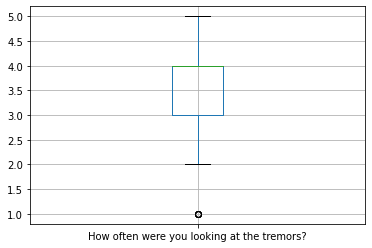

Female


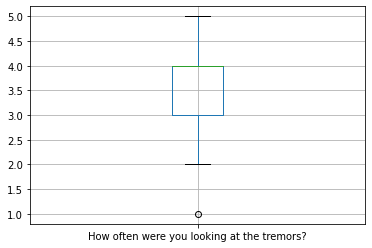

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,3.648649,0.977986,1.0,3.0,4.0,4.0,5.0
Male,71.0,3.507042,1.053880,1.0,3.0,4.0,4.0,5.0


p-value =  0.3026737954559887
u-value=  -0.7359800721939868
Male:  [1.399281371539093, 3.507042253521127, 5.614803135503161]
Female:  [1.6926768119838602, 3.6486486486486487, 5.604620485313437]
There is a Difference:  False


I found the tremors to be distracting.
Male


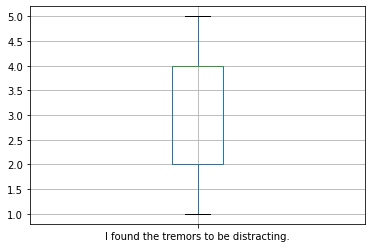

Female


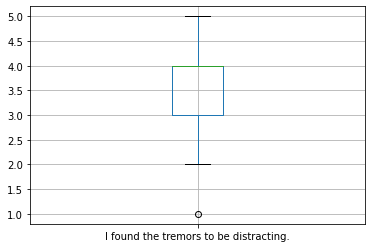

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,25.0,3.480000,1.004988,1.0,3.0,4.0,4.0,5.0
Male,51.0,3.196078,1.149254,1.0,2.0,4.0,4.0,5.0


p-value =  0.24627146611304124
u-value=  -0.7359800721939868
Male:  [0.8975708166577405, 3.196078431372549, 5.494586046087358]
Female:  [1.470024875775822, 3.48, 5.489975124224178]
There is a Difference:  False


I understood the content of the video.
Male


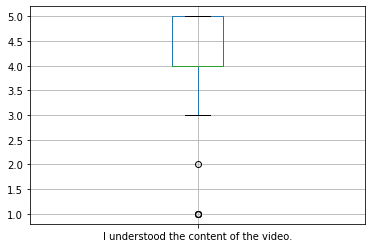

Female


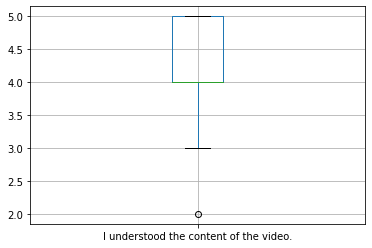

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,4.189189,0.739288,2.0,4.0,4.0,5.0,5.0
Male,71.0,4.197183,0.904271,1.0,4.0,4.0,5.0,5.0


p-value =  0.31408396041892667
u-value=  -0.7359800721939868
Male:  [2.3886408818605744, 4.197183098591549, 6.005725315322524]
Female:  [2.7106134602573952, 4.1891891891891895, 5.667764918120984]
There is a Difference:  False


Removing the tremors from the video would help me understand the content better.
Male


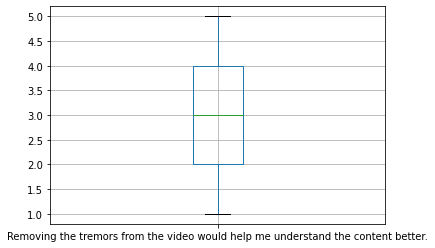

Female


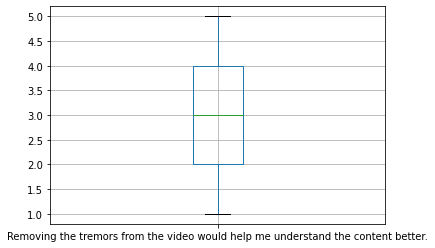

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,2.918919,1.361747,1.0,2.0,3.0,4.0,5.0
Male,71.0,3.000000,1.242118,1.0,2.0,3.0,4.0,5.0


p-value =  0.39219086694729977
u-value=  -0.7359800721939868
Male:  [0.5157639863675247, 3.0, 5.484236013632476]
Female:  [0.19542531374606664, 2.918918918918919, 5.642412524091771]
There is a Difference:  False


I would like to have the option to remove the tremors from the video.
Male


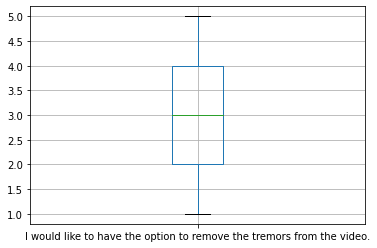

Female


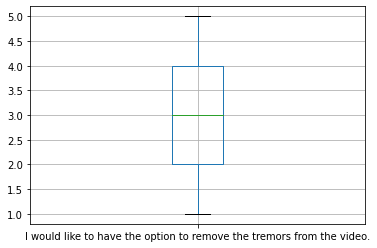

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,3.027027,1.258007,1.0,2.0,3.0,4.0,5.0
Male,71.0,2.957746,1.176394,1.0,2.0,3.0,4.0,5.0


p-value =  0.4056355721699021
u-value=  -0.7359800721939868
Male:  [0.6049579881472766, 2.9577464788732395, 5.310534969599202]
Female:  [0.5110122555421039, 3.027027027027027, 5.5430417985119504]
There is a Difference:  False


The speaker should have the option to remove the tremors from the video.
Male


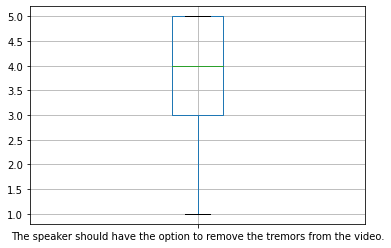

Female


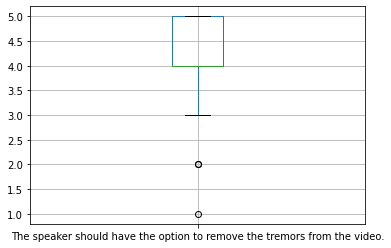

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,3.945946,0.970279,1.0,4.0,4.0,5.0,5.0
Male,71.0,3.718310,1.097830,1.0,3.0,4.0,5.0,5.0


p-value =  0.16514186880697584
u-value=  -0.7359800721939868
Male:  [1.5226492402705083, 3.7183098591549295, 5.913970478039351]
Female:  [2.0053878391720814, 3.945945945945946, 5.886504052719811]
There is a Difference:  False


I perceive the speaker as competent
Male


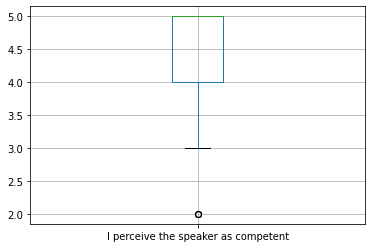

Female


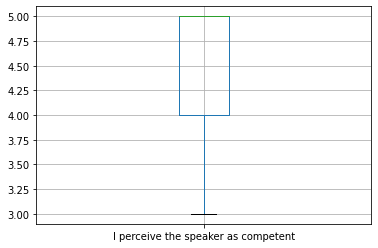

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,36.0,4.444444,0.652225,3.0,4.0,5.0,5.0,5.0
Male,71.0,4.380282,0.762818,2.0,4.0,5.0,5.0,5.0


p-value =  0.32079666338650314
u-value=  -0.7359800721939868
Male:  [2.854645628573695, 4.380281690140845, 5.905917751707995]
Female:  [3.139995403052907, 4.444444444444445, 5.748893485835982]
There is a Difference:  False


The speaker would appear more competent if the tremors were removed from the video
Male


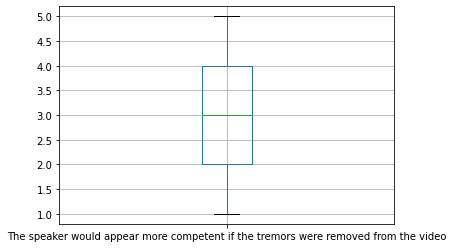

Female


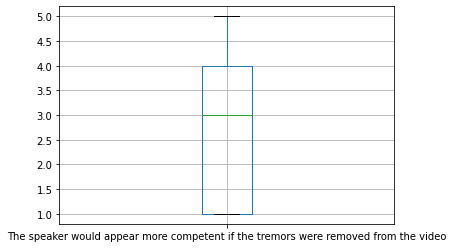

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,37.0,2.675676,1.453999,1.0,1.0,3.0,4.0,5.0
Male,71.0,2.929577,1.268564,1.0,2.0,3.0,4.0,5.0


p-value =  0.16435766623566145
u-value=  -0.7359800721939868
Male:  [0.3924487465726503, 2.9295774647887325, 5.466706183004815]
Female:  [-0.232323027291101, 2.675675675675676, 5.583674378642453]
There is a Difference:  False




In [135]:
# Gender Cell
# Compute the Mann-Whitney rank test on samples x and y
# scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

g = df.groupby('What is your gender?')

df_male = df[(df['What is your gender?'] == 'Male')].copy()
df_female = df[(df['What is your gender?'] == 'Female')].copy()

for q in q_list:
    col_name = q
    print(col_name)
    print("Male")
    df_male.boxplot(col_name)
    plt.show()
    print("Female")
    df_female.boxplot(col_name)
    plt.show()
    display(g[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_male[col_name], df_female[col_name])
    print('p-value = ', p)
    print('u-value= ', t)
    mu1 = df_male[col_name].mean()
    std1 = df_male[col_name].std()
    mu2 = df_female[col_name].mean()
    std2 = df_female[col_name].std()
    print("Male: ", compute_interval95(mu1, std1))
    print("Female: ", compute_interval95(mu2, std2))
    print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
    print('\n========================================\n')

# for q in q_list:
#     col_name = q
#     print(col_name)
#     print("Male")
#     df_male[col_name].hist()
#     plt.show()
#     print("Female")
#     df_female[col_name].hist()
#     plt.show()
#     display(g[col_name].describe())
#     #Statistic test
#     u,p = mannwhitneyu(df_male[col_name], df_female[col_name])
#     print('p-value = ', p)
#     print('u-value= ', t)
#     mu1 = df_male[col_name].mean()
#     std1 = df_male[col_name].std()
#     mu2 = df_female[col_name].mean()
#     std2 = df_female[col_name].std()
#     print("Male: ", compute_interval95(mu1, std1))
#     print("Female: ", compute_interval95(mu2, std2))
#     print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
#     print('\n========================================\n')

How often were you looking at the tremors?
Young


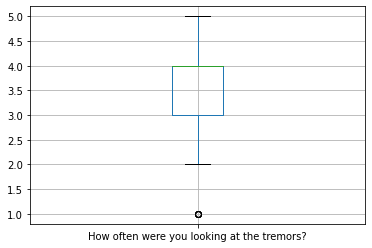

Old


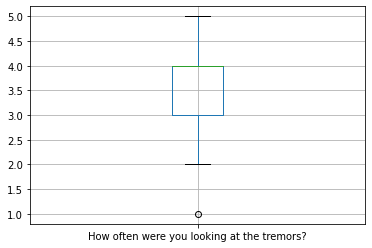

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
18-24 years old,4.0,3.500000,1.290994,2.0,2.75,3.5,4.25,5.0
25-34 years old,55.0,3.418182,1.117055,1.0,3.00,4.0,4.00,5.0
35-44 years old,22.0,3.681818,0.779888,2.0,3.00,4.0,4.00,5.0
45-54 years old,14.0,3.785714,1.050902,1.0,3.25,4.0,4.00,5.0
55-64 years old,12.0,3.666667,0.984732,2.0,3.00,4.0,4.00,5.0
65-74 years old,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0


p-value =  0.11286904613821885
u-value=  -0.7359800721939868
Young:  [1.4172083512242142, 3.493827160493827, 5.5704459697634405]
Old:  [1.7723292302470954, 3.740740740740741, 5.709152251234387]
There is a Difference:  False


I found the tremors to be distracting.
Young


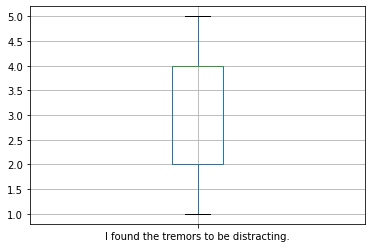

Old


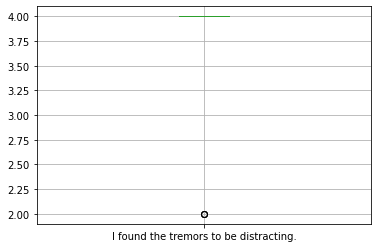

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
18-24 years old,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25-34 years old,42.0,3.095238,1.265095,1.0,2.00,3.0,4.0,5.0
35-44 years old,16.0,3.375000,0.885061,2.0,2.75,4.0,4.0,4.0
45-54 years old,9.0,3.333333,1.000000,2.0,2.00,4.0,4.0,4.0
55-64 years old,8.0,4.000000,0.000000,4.0,4.00,4.0,4.0,4.0
65-74 years old,1.0,4.000000,NaN,4.0,4.00,4.0,4.0,4.0


p-value =  0.26980646608356723
u-value=  -0.7359800721939868
Young:  [0.8286896301081299, 3.1724137931034484, 5.516137956098767]
Old:  [2.1327366889719257, 3.6666666666666665, 5.200596644361408]
There is a Difference:  False


I understood the content of the video.
Young


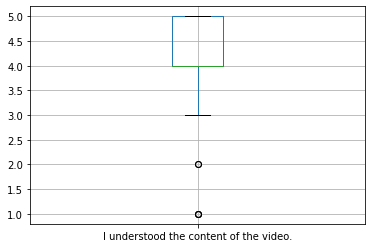

Old


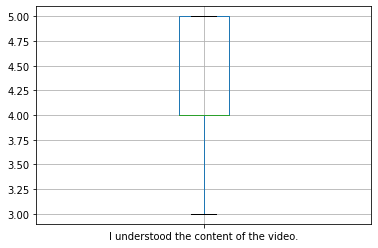

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
18-24 years old,4.0,4.000000,0.816497,3.0,3.75,4.0,4.25,5.0
25-34 years old,55.0,4.054545,1.025927,1.0,4.00,4.0,5.00,5.0
35-44 years old,22.0,4.318182,0.567900,3.0,4.00,4.0,5.00,5.0
45-54 years old,14.0,4.428571,0.513553,4.0,4.00,4.0,5.00,5.0
55-64 years old,12.0,4.416667,0.668558,3.0,4.00,4.5,5.00,5.0
65-74 years old,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0


p-value =  0.10461496366125717
u-value=  -0.7359800721939868
Young:  [2.2963630309150593, 4.1234567901234565, 5.950550549331854]
Old:  [3.2626186449969308, 4.407407407407407, 5.5521961698178846]
There is a Difference:  False


Removing the tremors from the video would help me understand the content better.
Young


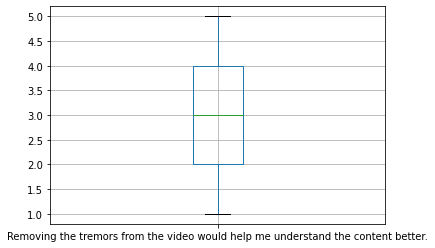

Old


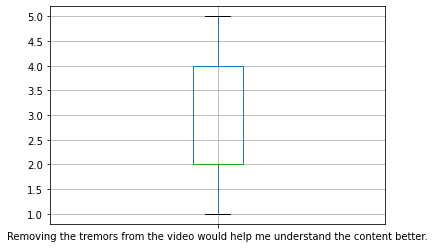

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
18-24 years old,4.0,3.000000,1.154701,2.0,2.0,3.0,4.0,4.0
25-34 years old,55.0,3.127273,1.248029,1.0,2.0,3.0,4.0,5.0
35-44 years old,22.0,2.772727,1.342770,1.0,2.0,3.0,4.0,5.0
45-54 years old,14.0,2.785714,1.368805,1.0,2.0,2.0,4.0,5.0
55-64 years old,12.0,2.916667,1.378954,1.0,2.0,2.0,4.0,5.0
65-74 years old,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0


p-value =  0.2289291194916543
u-value=  -0.7359800721939868
Young:  [0.49535728277928603, 3.0246913580246915, 5.5540254332700965]
Old:  [0.15242508220257234, 2.814814814814815, 5.477204547427057]
There is a Difference:  False


I would like to have the option to remove the tremors from the video.
Young


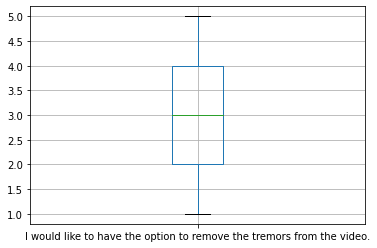

Old


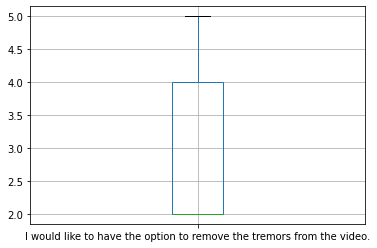

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
18-24 years old,4.0,3.250000,0.957427,2.0,2.75,3.5,4.0,4.0
25-34 years old,55.0,2.981818,1.209391,1.0,2.00,3.0,4.0,5.0
35-44 years old,22.0,3.000000,1.414214,1.0,2.00,3.5,4.0,5.0
45-54 years old,14.0,2.928571,1.071612,2.0,2.00,2.5,4.0,5.0
55-64 years old,12.0,3.000000,1.128152,2.0,2.00,2.5,4.0,5.0
65-74 years old,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0


p-value =  0.3700423001156068
u-value=  -0.7359800721939868
Young:  [0.5100200804022537, 3.0, 5.489979919597746]
Old:  [0.7828924234830468, 2.925925925925926, 5.068959428368805]
There is a Difference:  False


The speaker should have the option to remove the tremors from the video.
Young


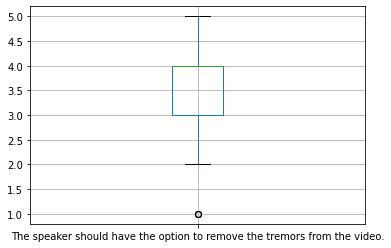

Old


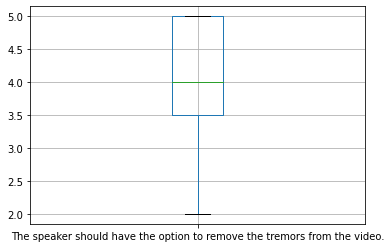

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
18-24 years old,4.0,4.000000,1.414214,2.0,3.50,4.5,5.00,5.0
25-34 years old,55.0,3.654545,1.075281,1.0,3.00,4.0,4.00,5.0
35-44 years old,22.0,3.818182,1.097025,1.0,3.25,4.0,4.75,5.0
45-54 years old,14.0,4.071429,0.730046,3.0,4.00,4.0,4.75,5.0
55-64 years old,12.0,4.166667,1.029857,2.0,3.75,4.5,5.00,5.0
65-74 years old,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0


p-value =  0.09968067234441597
u-value=  -0.7359800721939868
Young:  [1.542697871771845, 3.7160493827160495, 5.8894008936602535]
Old:  [2.1574723180758797, 4.037037037037037, 5.916601755998195]
There is a Difference:  False


I perceive the speaker as competent
Young


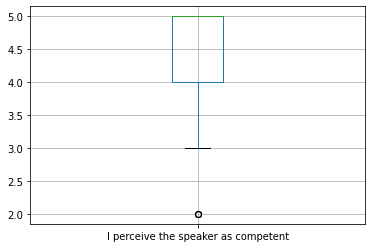

Old


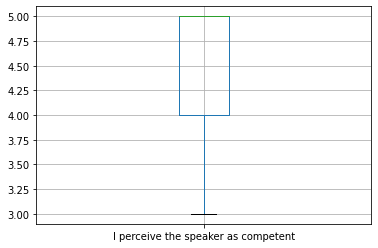

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
18-24 years old,4.0,4.750000,0.500000,4.0,4.75,5.0,5.0,5.0
25-34 years old,54.0,4.240741,0.845302,2.0,4.00,4.0,5.0,5.0
35-44 years old,22.0,4.636364,0.492366,4.0,4.00,5.0,5.0,5.0
45-54 years old,14.0,4.500000,0.518875,4.0,4.00,4.5,5.0,5.0
55-64 years old,12.0,4.500000,0.674200,3.0,4.00,5.0,5.0,5.0
65-74 years old,1.0,4.000000,NaN,4.0,4.00,4.0,4.0,4.0


p-value =  0.416991014931304
u-value=  -0.7359800721939868
Young:  [2.836465435034059, 4.375, 5.913534564965941]
Old:  [3.321856824650943, 4.481481481481482, 5.64110613831202]
There is a Difference:  False


The speaker would appear more competent if the tremors were removed from the video
Young


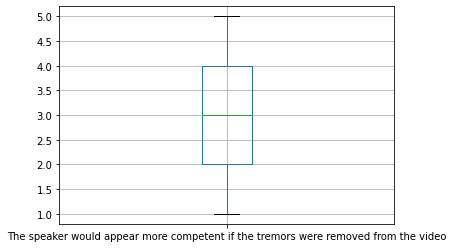

Old


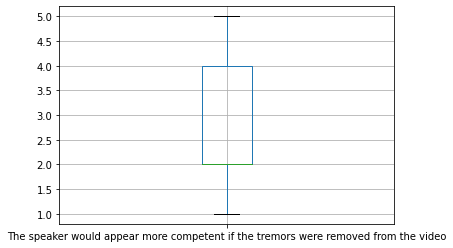

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
18-24 years old,4.0,3.000000,0.816497,2.0,2.75,3.0,3.25,4.0
25-34 years old,55.0,3.090909,1.364534,1.0,2.00,3.0,4.00,5.0
35-44 years old,22.0,2.409091,1.333063,1.0,1.00,2.0,4.00,5.0
45-54 years old,14.0,2.500000,1.400549,1.0,1.25,2.0,4.00,5.0
55-64 years old,12.0,2.916667,1.164500,1.0,2.00,3.0,4.00,5.0
65-74 years old,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0


p-value =  0.22442619659026647
u-value=  -0.7359800721939868
Young:  [0.18821156262455707, 2.9012345679012346, 5.6142575731779125]
Old:  [0.1247110294576963, 2.6666666666666665, 5.208622303875637]
There is a Difference:  False




In [136]:
# Age Cell
# Compute the Mann-Whitney rank test on samples x and y
# scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

g = df.groupby('What is your age?')

df_young = df[(df['What is your age?'] == '18-24 years old') | 
             (df['What is your age?'] == '25-34 years old') |
             (df['What is your age?'] == '35-44 years old')].copy()

df_old = df[(df['What is your age?'] == '45-54 years old') | 
             (df['What is your age?'] == '55-64 years old') |
             (df['What is your age?'] == '65-74 years old') |
             (df['What is your age?'] == '75 years or older')].copy()

for q in q_list:
    col_name = q
    print(col_name)
    print("Young")
    df_young.boxplot(col_name)
    plt.show()
    print("Old")
    df_old.boxplot(col_name)
    plt.show()
    display(g[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_young[col_name], df_old[col_name])
    print('p-value = ', p)
    print('u-value= ', t)
    mu1 = df_young[col_name].mean()
    std1 = df_young[col_name].std()
    mu2 = df_old[col_name].mean()
    std2 = df_old[col_name].std()
    print("Young: ", compute_interval95(mu1, std1))
    print("Old: ", compute_interval95(mu2, std2))
    print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
    print('\n========================================\n')

How often were you looking at the tremors?
White


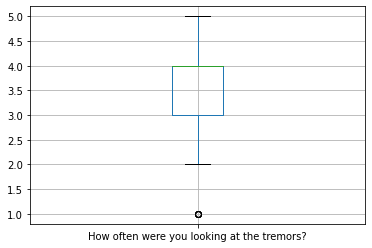

Not White


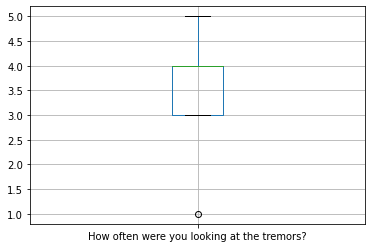

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
Asian,7.0,3.285714,1.112697,1.0,3.00,4.0,4.00,4.0
Black or African American,11.0,3.818182,0.603023,3.0,3.50,4.0,4.00,5.0
White,84.0,3.523810,1.080787,1.0,3.00,4.0,4.00,5.0
"White, American Indian or Alaska Native",1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
"White, Asian",2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0
"White, Asian, Native Hawaiian or Pacific Islander",1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
"White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Pacific Islander",1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0


p-value =  0.308534325432294
u-value=  -0.7359800721939868
White:  [1.3622351204360093, 3.5238095238095237, 5.685383927183038]
Not White:  [2.0336735048112144, 3.6666666666666665, 5.299659828522119]
There is a Difference:  False


I found the tremors to be distracting.
White


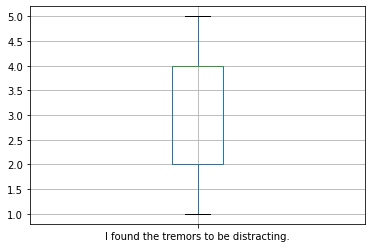

Not White


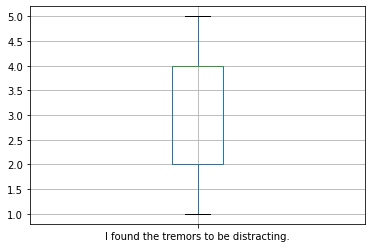

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
Asian,3.0,3.000000,1.732051,1.0,2.5,4.0,4.0,4.0
Black or African American,9.0,3.333333,1.000000,2.0,2.0,4.0,4.0,4.0
White,59.0,3.237288,1.088165,1.0,2.0,4.0,4.0,5.0
"White, American Indian or Alaska Native",1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
"White, Asian",2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
"White, Asian, Native Hawaiian or Pacific Islander",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Pacific Islander",1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0


p-value =  0.42907277157531065
u-value=  -0.7359800721939868
White:  [1.0609583225158676, 3.23728813559322, 5.413617948670573]
Not White:  [1.1128724913139902, 3.4705882352941178, 5.828303979274246]
There is a Difference:  False


I understood the content of the video.
White


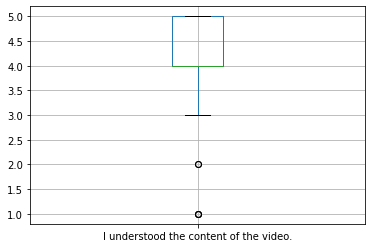

Not White


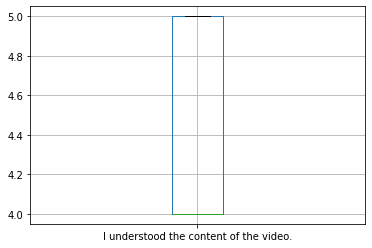

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
Asian,7.0,4.428571,0.534522,4.0,4.0,4.0,5.0,5.0
Black or African American,11.0,4.272727,0.467099,4.0,4.0,4.0,4.5,5.0
White,84.0,4.142857,0.920226,1.0,4.0,4.0,5.0,5.0
"White, American Indian or Alaska Native",1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
"White, Asian",2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
"White, Asian, Native Hawaiian or Pacific Islander",1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
"White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Pacific Islander",1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0


p-value =  0.23387999098971968
u-value=  -0.7359800721939868
White:  [2.30240520404685, 4.142857142857143, 5.983309081667437]
Not White:  [3.3859292899063194, 4.375, 5.364070710093681]
There is a Difference:  False


Removing the tremors from the video would help me understand the content better.
White


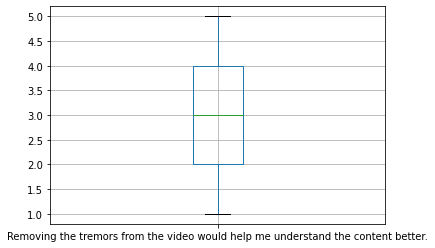

Not White


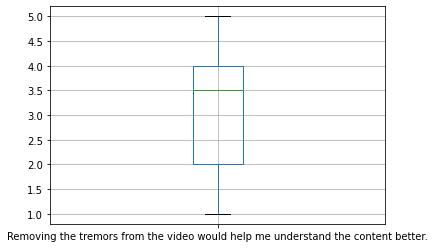

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
Asian,7.0,3.000000,0.816497,2.0,2.5,3.0,3.5,4.0
Black or African American,11.0,3.181818,1.250454,1.0,2.0,4.0,4.0,5.0
White,84.0,2.916667,1.282020,1.0,2.0,3.0,4.0,5.0
"White, American Indian or Alaska Native",1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
"White, Asian",2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
"White, Asian, Native Hawaiian or Pacific Islander",1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
"White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Pacific Islander",1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0


p-value =  0.19888998070477093
u-value=  -0.7359800721939868
White:  [0.3526274335902655, 2.9166666666666665, 5.480705899743068]
Not White:  [0.618578437584242, 3.1666666666666665, 5.714754895749091]
There is a Difference:  False


I would like to have the option to remove the tremors from the video.
White


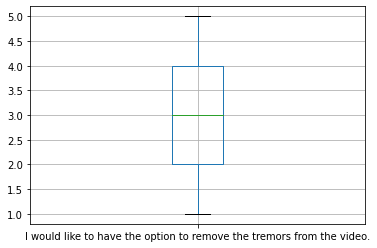

Not White


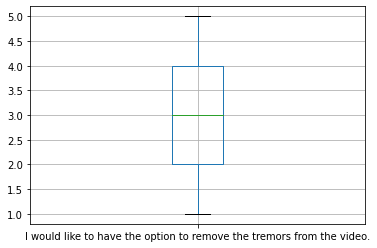

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
Asian,7.0,2.571429,1.133893,1.0,2.0,2.0,3.5,4.0
Black or African American,11.0,2.909091,1.136182,1.0,2.0,3.0,4.0,4.0
White,84.0,2.988095,1.187222,1.0,2.0,3.0,4.0,5.0
"White, American Indian or Alaska Native",1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
"White, Asian",2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
"White, Asian, Native Hawaiian or Pacific Islander",1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
"White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Pacific Islander",1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0


p-value =  0.46481885176460497
u-value=  -0.7359800721939868
White:  [0.6136520415958611, 2.988095238095238, 5.362538434594615]
Not White:  [0.42307472090657416, 2.9583333333333335, 5.493591945760093]
There is a Difference:  False


The speaker should have the option to remove the tremors from the video.
White


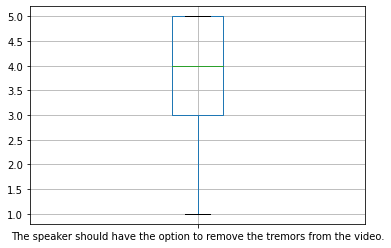

Not White


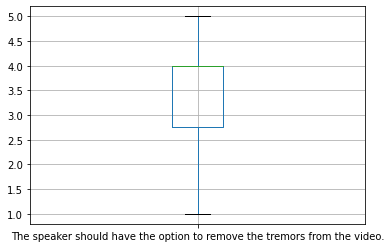

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
Asian,7.0,3.285714,1.380131,1.0,2.5,4.0,4.0,5.0
Black or African American,11.0,3.545455,1.128152,2.0,2.5,4.0,4.0,5.0
White,84.0,3.869048,0.991284,1.0,3.0,4.0,5.0,5.0
"White, American Indian or Alaska Native",1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
"White, Asian",2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
"White, Asian, Native Hawaiian or Pacific Islander",1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
"White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Pacific Islander",1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0


p-value =  0.16278106756472577
u-value=  -0.7359800721939868
White:  [1.8864787146460742, 3.869047619047619, 5.851616523449164]
Not White:  [1.0409421339750313, 3.5416666666666665, 6.042391199358302]
There is a Difference:  False


I perceive the speaker as competent
White


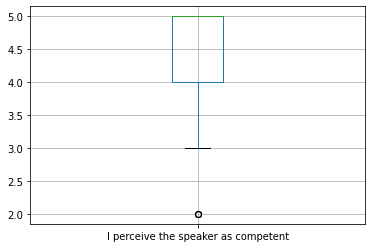

Not White


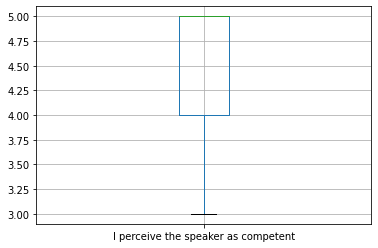

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
Asian,7.0,4.571429,0.534522,4.0,4.00,5.0,5.00,5.0
Black or African American,11.0,4.272727,0.646670,3.0,4.00,4.0,5.00,5.0
White,83.0,4.373494,0.760469,2.0,4.00,5.0,5.00,5.0
"White, American Indian or Alaska Native",1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
"White, Asian",2.0,4.500000,0.707107,4.0,4.25,4.5,4.75,5.0
"White, Asian, Native Hawaiian or Pacific Islander",1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
"White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Pacific Islander",1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0


p-value =  0.3462659954125269
u-value=  -0.7359800721939868
White:  [2.8525557746448675, 4.373493975903615, 5.894432177162361]
Not White:  [3.320464350760823, 4.5, 5.6795356492391775]
There is a Difference:  False


The speaker would appear more competent if the tremors were removed from the video
White


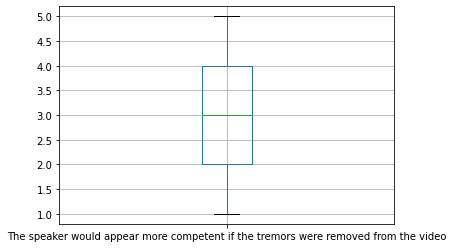

Not White


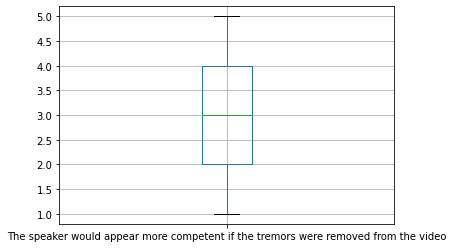

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,1.0,5.00000,NaN,5.0,5.00,5.0,5.00,5.0
Asian,7.0,3.00000,1.414214,1.0,2.00,3.0,4.00,5.0
Black or African American,11.0,3.00000,1.264911,1.0,2.00,3.0,4.00,5.0
White,84.0,2.77381,1.329473,1.0,2.00,3.0,4.00,5.0
"White, American Indian or Alaska Native",1.0,2.00000,NaN,2.0,2.00,2.0,2.00,2.0
"White, Asian",2.0,3.50000,0.707107,3.0,3.25,3.5,3.75,4.0
"White, Asian, Native Hawaiian or Pacific Islander",1.0,1.00000,NaN,1.0,1.00,1.0,1.00,1.0
"White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Pacific Islander",1.0,5.00000,NaN,5.0,5.00,5.0,5.00,5.0


p-value =  0.15745925388586451
u-value=  -0.7359800721939868
White:  [0.11486344260265824, 2.7738095238095237, 5.432755605016389]
Not White:  [0.38604537710015085, 3.0833333333333335, 5.7806212895665166]
There is a Difference:  False




In [137]:
# Race Cell
# Compute the Mann-Whitney rank test on samples x and y
# scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

g = df.groupby('What is your race? (Check all that apply)')

df_white = df[(df['What is your race? (Check all that apply)'] == 'White')].copy()
df_notwhite = df[(df['What is your race? (Check all that apply)'] != 'White')].copy()

for q in q_list:
    col_name = q
    print(col_name)
    print("White")
    df_white.boxplot(col_name)
    plt.show()
    print("Not White")
    df_notwhite.boxplot(col_name)
    plt.show()
    display(g[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_white[col_name], df_notwhite[col_name])
    print('p-value = ', p)
    print('u-value= ', t)
    mu1 = df_white[col_name].mean()
    std1 = df_white[col_name].std()
    mu2 = df_notwhite[col_name].mean()
    std2 = df_notwhite[col_name].std()
    print("White: ", compute_interval95(mu1, std1))
    print("Not White: ", compute_interval95(mu2, std2))
    print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
    print('\n========================================\n')

How often were you looking at the tremors?
High Education


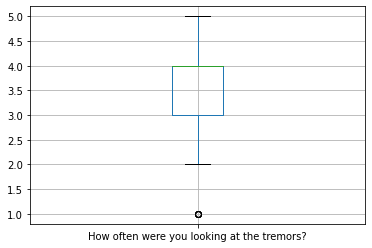

Low Education


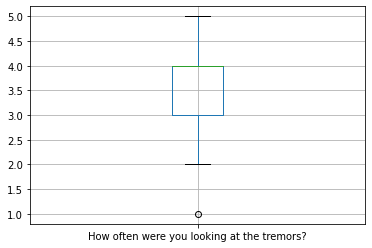

,count,mean,std,min,25%,50%,75%,max
What is your education level?,,,,,,,,
Bachelor's Degree,56.0,3.571429,1.093071,1.0,3.00,4.0,4.00,5.0
High School,12.0,3.500000,0.904534,2.0,3.00,4.0,4.00,5.0
Master's Degree,15.0,3.400000,1.055597,1.0,3.00,3.0,4.00,5.0
Some College,23.0,3.652174,0.982052,1.0,3.00,4.0,4.00,5.0
Trade School,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0


p-value =  0.3960841792566652
u-value=  -0.7359800721939868
High Education:  [1.3750264629321887, 3.535211267605634, 5.695396072279079]
Low Education:  [1.741101828103332, 3.5945945945945947, 5.448087361085857]
There is a Difference:  False


I found the tremors to be distracting.
High Education


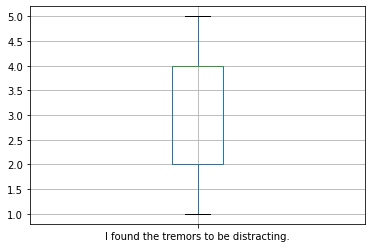

Low Education


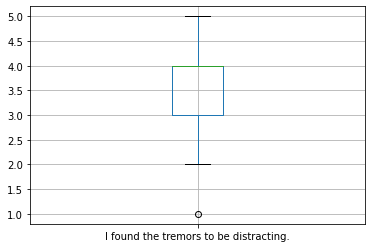

,count,mean,std,min,25%,50%,75%,max
What is your education level?,,,,,,,,
Bachelor's Degree,40.0,3.275,1.131994,1.0,2.00,4.0,4.0,5.0
High School,6.0,3.000,1.264911,1.0,2.25,3.5,4.0,4.0
Master's Degree,13.0,3.000,1.224745,1.0,2.00,3.0,4.0,5.0
Some College,16.0,3.625,0.885061,2.0,3.75,4.0,4.0,5.0
Trade School,1.0,4.000,NaN,4.0,4.00,4.0,4.0,4.0


p-value =  0.024104329084944726
u-value=  -0.7359800721939868
High Education:  [0.9084339439035003, 3.207547169811321, 5.506660395719141]
Low Education:  [1.4901539383463571, 3.4782608695652173, 5.466367800784077]
There is a Difference:  False


I understood the content of the video.
High Education


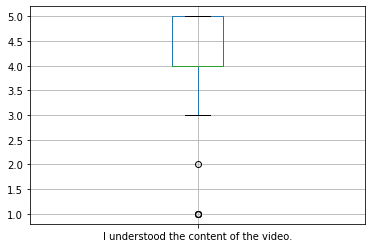

Low Education


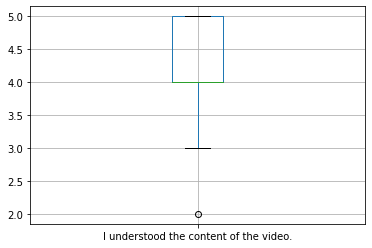

,count,mean,std,min,25%,50%,75%,max
What is your education level?,,,,,,,,
Bachelor's Degree,56.0,4.107143,0.984952,1.0,4.0,4.0,5.0,5.0
High School,12.0,4.500000,0.522233,4.0,4.0,4.5,5.0,5.0
Master's Degree,15.0,4.266667,0.457738,4.0,4.0,4.0,4.5,5.0
Some College,23.0,4.130435,0.814881,2.0,4.0,4.0,5.0,5.0
Trade School,2.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


p-value =  0.21537683002014468
u-value=  -0.7359800721939868
High Education:  [2.3425673341144284, 4.140845070422535, 5.939122806730642]
Low Education:  [2.8166919507608905, 4.297297297297297, 5.777902643833704]
There is a Difference:  False


Removing the tremors from the video would help me understand the content better.
High Education


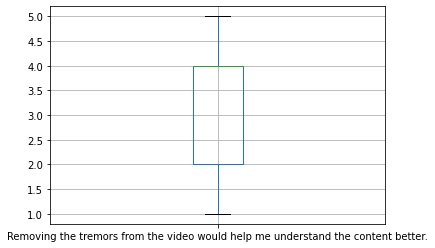

Low Education


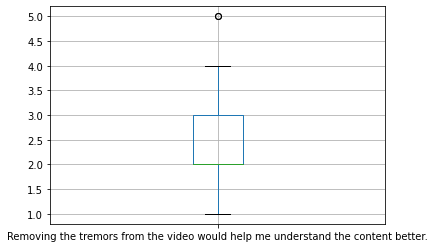

,count,mean,std,min,25%,50%,75%,max
What is your education level?,,,,,,,,
Bachelor's Degree,56.0,3.214286,1.201730,1.0,2.0,3.5,4.0,5.0
High School,12.0,2.166667,1.114641,1.0,1.0,2.0,3.0,4.0
Master's Degree,15.0,3.200000,1.567528,1.0,1.5,4.0,4.0,5.0
Some College,23.0,2.739130,1.214211,1.0,2.0,2.0,4.0,5.0
Trade School,2.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


p-value =  0.0033698444397707097
u-value=  -0.7359800721939868
High Education:  [0.6608504306211351, 3.211267605633803, 5.761684780646471]
Low Education:  [0.1743958440767086, 2.5135135135135136, 4.852631182950319]
There is a Difference:  False


I would like to have the option to remove the tremors from the video.
High Education


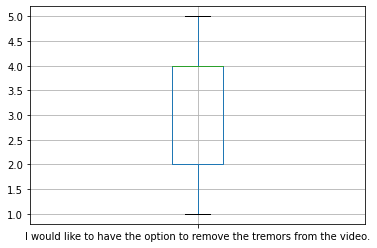

Low Education


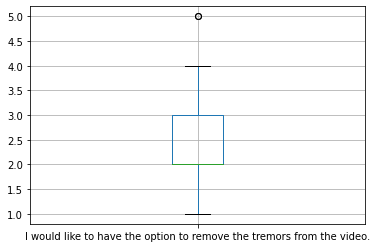

,count,mean,std,min,25%,50%,75%,max
What is your education level?,,,,,,,,
Bachelor's Degree,56.0,3.178571,1.177164,1.0,2.0,4.0,4.0,5.0
High School,12.0,2.333333,0.984732,1.0,2.0,2.0,3.0,4.0
Master's Degree,15.0,3.000000,1.511858,1.0,2.0,3.0,4.0,5.0
Some College,23.0,2.913043,1.083473,1.0,2.0,3.0,4.0,5.0
Trade School,2.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


p-value =  0.025151603516883937
u-value=  -0.7359800721939868
High Education:  [0.649814884268626, 3.140845070422535, 5.6318752565764445]
Low Education:  [0.5646435924385553, 2.675675675675676, 4.786707758912796]
There is a Difference:  False


The speaker should have the option to remove the tremors from the video.
High Education


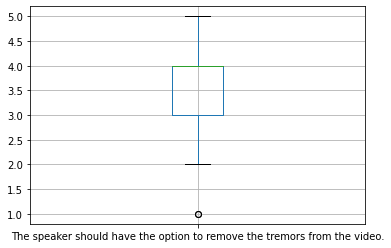

Low Education


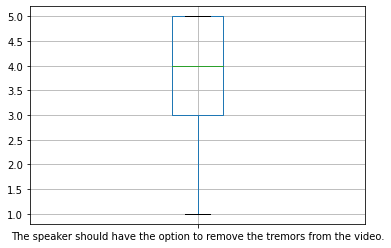

,count,mean,std,min,25%,50%,75%,max
What is your education level?,,,,,,,,
Bachelor's Degree,56.0,3.732143,0.999838,1.0,3.0,4.0,4.0,5.0
High School,12.0,3.833333,1.114641,2.0,3.0,4.0,5.0,5.0
Master's Degree,15.0,3.666667,1.046536,1.0,3.5,4.0,4.0,5.0
Some College,23.0,3.913043,1.202764,1.0,3.5,4.0,5.0,5.0
Trade School,2.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


p-value =  0.07351506696636131
u-value=  -0.7359800721939868
High Education:  [1.7130852948430118, 3.7183098591549295, 5.723534423466847]
Low Education:  [1.6391470120721414, 3.945945945945946, 6.252744879819751]
There is a Difference:  False


I perceive the speaker as competent
High Education


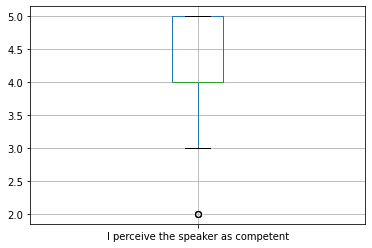

Low Education


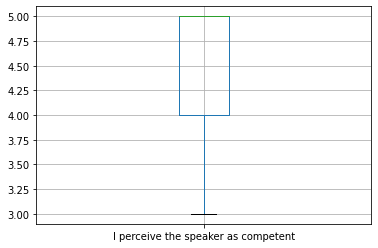

,count,mean,std,min,25%,50%,75%,max
What is your education level?,,,,,,,,
Bachelor's Degree,55.0,4.181818,0.818556,2.0,4.0,4.0,5.0,5.0
High School,12.0,4.666667,0.492366,4.0,4.0,5.0,5.0,5.0
Master's Degree,15.0,4.533333,0.516398,4.0,4.0,5.0,5.0,5.0
Some College,23.0,4.652174,0.572768,3.0,4.0,5.0,5.0,5.0
Trade School,2.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


p-value =  0.0030840504747242613
u-value=  -0.7359800721939868
High Education:  [2.708484184193841, 4.257142857142857, 5.805801530091873]
Low Education:  [3.6159006414711876, 4.675675675675675, 5.735450709880164]
There is a Difference:  False


The speaker would appear more competent if the tremors were removed from the video
High Education


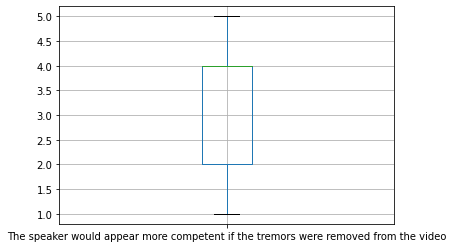

Low Education


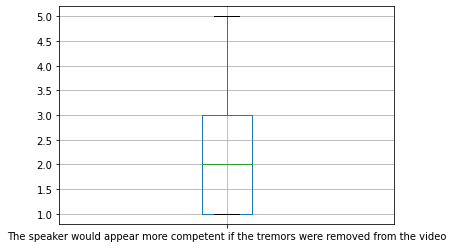

,count,mean,std,min,25%,50%,75%,max
What is your education level?,,,,,,,,
Bachelor's Degree,56.0,3.303571,1.219831,1.0,2.00,4.0,4.00,5.0
High School,12.0,1.833333,0.834847,1.0,1.00,2.0,2.25,3.0
Master's Degree,15.0,3.066667,1.579632,1.0,1.50,4.0,4.00,5.0
Some College,23.0,2.130435,1.140349,1.0,1.00,2.0,3.00,5.0
Trade School,2.0,2.500000,0.707107,2.0,2.25,2.5,2.75,3.0


p-value =  4.394524973628011e-06
u-value=  -0.7359800721939868
High Education:  [0.6630261964618338, 3.2535211267605635, 5.844016057059293]
Low Education:  [0.00217437673128007, 2.054054054054054, 4.105933731376828]
There is a Difference:  False




In [138]:
# Education Cell
# Compute the Mann-Whitney rank test on samples x and y
# scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

g = df.groupby('What is your education level?')

df_lowedu = df[(df['What is your education level?'] == 'Trade School') |
             (df['What is your education level?'] == 'Some High School') | 
             (df['What is your education level?'] == 'High School') |
             (df['What is your education level?'] == 'Some College')].copy()

df_highedu = df[(df['What is your education level?'] == "Bachelor's Degree") | 
             (df['What is your education level?'] == "Master's Degree") |
             (df['What is your education level?'] == 'Ph.D. or higher')].copy()

# g = df.groupby('What the highest level of education you have obtained?')

# df_lowedu = df[(df['What the highest level of education you have obtained?'] == 'Trade School') |
#              (df['What the highest level of education you have obtained?'] == 'Some High School') | 
#              (df['What the highest level of education you have obtained?'] == 'High School') |
#              (df['What the highest level of education you have obtained?'] == 'Some College')].copy()

# df_highedu = df[(df['What the highest level of education you have obtained?'] == "Bachelor's Degree") | 
#              (df['What the highest level of education you have obtained?'] == "Master's Degree") |
#              (df['What the highest level of education you have obtained?'] == 'Ph.D. or higher')].copy()

for q in q_list:
    col_name = q
    print(col_name)
    print("High Education")
    df_highedu.boxplot(col_name)
    plt.show()
    print("Low Education")
    df_lowedu.boxplot(col_name)
    plt.show()
    display(g[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_highedu[col_name], df_lowedu[col_name])
    print('p-value = ', p)
    print('u-value= ', t)
    mu1 = df_highedu[col_name].mean()
    std1 = df_highedu[col_name].std()
    mu2 = df_lowedu[col_name].mean()
    std2 = df_lowedu[col_name].std()
    print("High Education: ", compute_interval95(mu1, std1))
    print("Low Education: ", compute_interval95(mu2, std2))
    print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
    print('\n========================================\n')